In [31]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [84]:
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [75]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [78]:
for layer in vgg.layers:
    layer.trainable = False

In [79]:
# import matplotlib.pyplot as plt

# img_path = '../datasets/cabbage/cabbage_1.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# plt.imshow(img)
# x = image.img_to_array(img)
# print(x.shape)
# x = np.expand_dims(x, axis=0)
# print(x.shape)
# x = preprocess_input(x)
# print(x.shape)

# features = model.predict(x)
# print(features.shape)

In [80]:
# model = Sequential()

In [81]:
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [82]:
# model.add(Flatten())
# model.add(Dense(units=32,activation="relu"))
# model.add(Dense(units=32,activation="relu"))
# model.add(Dense(units=5, activation="softmax"))

In [85]:
x = Flatten()(vgg.output)
x = Dense(units=32, activation="relu")(x)
x = Dense(units=32, activation="relu")(x)
pred = Dense(5, activation="softmax")(x)
model = Model(inputs=vgg.input, outputs=pred)

In [86]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [87]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [88]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [89]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="../datasets/ver1/daeho_Training", target_size=(224,224))
tsdata = ImageDataGenerator()                        
testdata = tsdata.flow_from_directory(directory="../datasets/ver1/daeho_Testing", target_size=(224,224))

Found 8000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [90]:
hist = model.fit_generator(steps_per_epoch=5,generator=traindata,
                           validation_data= testdata, validation_steps=10,epochs=5,callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
5/5 [==============================] - 52s 10s/step - loss: 4.4889 - accuracy: 0.4938 - val_loss: 1.0641 - val_accuracy: 0.7469
Epoch 2/5
5/5 [==============================] - 57s 11s/step - loss: 0.7998 - accuracy: 0.8625 - val_loss: 0.8544 - val_accuracy: 0.8813
Epoch 3/5
5/5 [==============================] - 57s 11s/step - loss: 0.4165 - accuracy: 0.9062 - val_loss: 0.4052 - val_accuracy: 0.9344
Epoch 4/5
5/5 [==============================] - 59s 12s/step - loss: 0.3241 - accuracy: 0.9312 - val_loss: 0.3495 - val_accuracy: 0.9344
Epoch 5/5
5/5 [==============================] - 60s 12s/step - loss: 0.5074 - accuracy: 0.9187 - val_loss: 0.3493 - val_accuracy: 0.9500


{'loss': [4.488948345184326, 0.7998448014259338, 0.41648608446121216, 0.32413771748542786, 0.5073959827423096], 'accuracy': [0.4937500059604645, 0.862500011920929, 0.90625, 0.9312499761581421, 0.918749988079071], 'val_loss': [1.064148187637329, 0.8544026613235474, 0.4052087664604187, 0.3494640290737152, 0.3493489623069763], 'val_accuracy': [0.746874988079071, 0.8812500238418579, 0.934374988079071, 0.934374988079071, 0.949999988079071]}


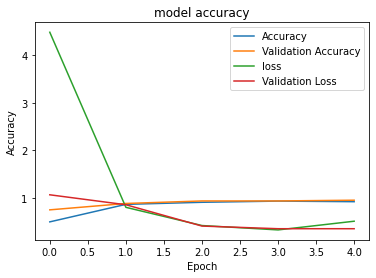

In [91]:
import matplotlib.pyplot as plt
print(hist.history)
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
plt.show()

In [92]:
model.save("vgg16")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: vgg16\assets


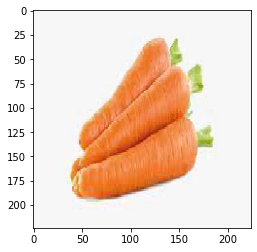

In [94]:
from keras.preprocessing import image
import tensorflow as tf
img = image.load_img("../datasets/carrot/carrot_1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
loaded_model = tf.keras.models.load_model('vgg16')

In [95]:
img = image.load_img("../datasets/carrot/carrot_1.jpg",target_size=(224,224))
img = np.asarray(img)

img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
output

array([[3.0247152e-11, 9.9999952e-01, 6.9056100e-08, 3.5797984e-07,
        1.9104764e-17]], dtype=float32)

In [96]:
output = loaded_model.predict(img)
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output


onion


array([[3.0247152e-11, 9.9999952e-01, 6.9056100e-08, 3.5797984e-07,
        1.9104764e-17]], dtype=float32)

[[1.3716724e-08 9.9999475e-01 4.6964484e-08 5.2207229e-06 1.2318574e-19]]
onion


array([[1.3716724e-08, 9.9999475e-01, 4.6964484e-08, 5.2207229e-06,
        1.2318574e-19]], dtype=float32)

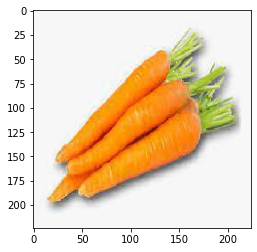

In [107]:
img = image.load_img("../datasets/carrot/carrot_7.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
print(output)
img1 = img
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output

[[1.4401519e-06 3.2379543e-08 6.0959928e-07 9.9999797e-01 1.1405974e-14]]
cabbage


array([[1.4401519e-06, 3.2379543e-08, 6.0959928e-07, 9.9999797e-01,
        1.1405974e-14]], dtype=float32)

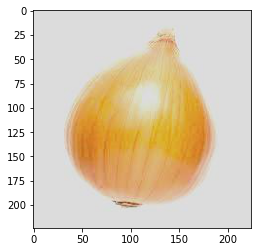

In [106]:
img = image.load_img("../datasets/onion/onion_100.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = loaded_model.predict(img)
print(output)
img2 = img
if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("cabbage")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("onion")    
else:
    print('carrot')
output
